In [36]:
#필요한 라이브러리 로드
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# seaborn과 matplotlib는 시각화하기 위해서

In [12]:
df = pd.read_csv("./Data/diabetes.csv")
print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
#수치형 데이터를 범주화하여 성능을 높임.

df['Pregnancies_high']=df['Pregnancies']>6
df[['Pregnancies','Pregnancies_high']].head()


,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


### 학습, 예측 데이터셋 나누기

In [14]:
#행의 80%만 학습 세트로 만든다.
split_count  = int(df.shape[0] * 0.8)
split_count

614

In [15]:
train = df[:split_count].copy()
train.shape

(614, 10)

In [16]:
test = df[split_count:].copy()
test.shape

(154, 10)

### 학습,예측에 사용할 컬럼

In [17]:
feature_names = train.columns[:].tolist()
feature_names.remove('Outcome')
feature_names.remove('Pregnancies')
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high']

In [18]:
label_name = 'Outcome'
label_name

'Outcome'

### 학습, 예측 데이터 셋 만들기

In [20]:
#학습데이터셋
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(614, 8)


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high
0,148,72,35,0,33.6,0.627,50,False
1,85,66,29,0,26.6,0.351,31,False
2,183,64,0,0,23.3,0.672,32,True
3,89,66,23,94,28.1,0.167,21,False
4,137,40,35,168,43.1,2.288,33,False


In [21]:
Y_train = train[label_name]
print(Y_train.shape)
Y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [22]:
#테스트를 위한 데이터셋
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 8)


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high
614,138,74,26,144,36.1,0.557,50,True
615,106,72,0,0,25.8,0.207,27,False
616,117,96,0,0,28.7,0.157,30,False
617,68,62,13,15,20.1,0.257,23,False
618,112,82,24,0,28.2,1.282,50,True


In [23]:
Y_test = test[label_name]
print(Y_test.shape)
Y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

### 머신러닝 알고리즘 가져오기

In [24]:
from sklearn.tree import DecisionTreeClassifier

model =  DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [25]:
# 훈련
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [26]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 1, 0, 1], dtype=int64)

### 트리 알고리즘 분석하기



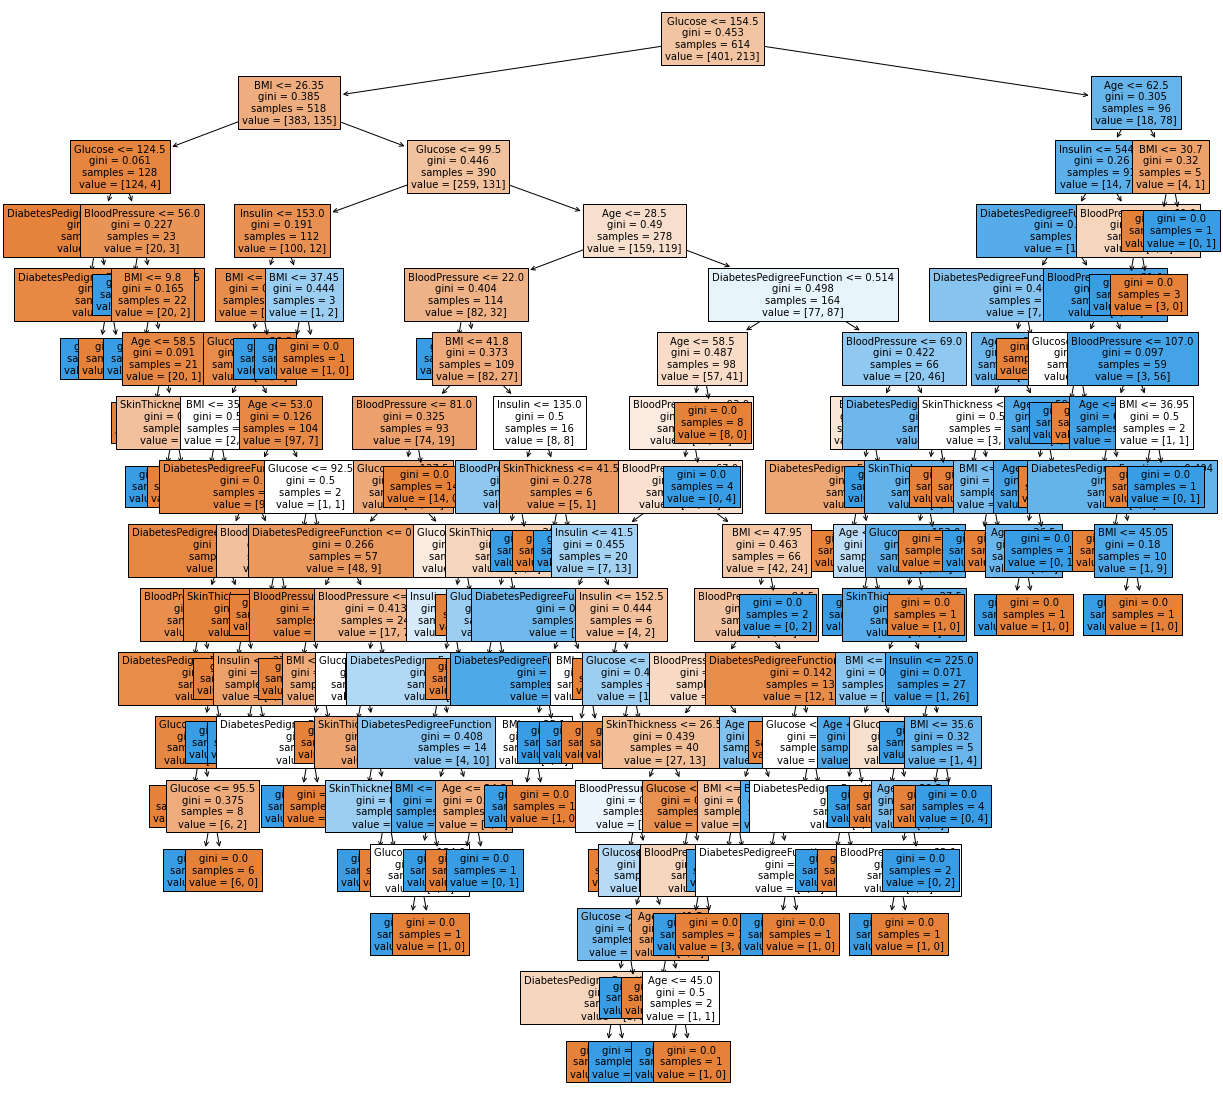

In [27]:
from sklearn.tree import plot_tree

#plot_tree(model,feature_names = feature_names)
#시각화하면
plt.figure(figsize = (20,20))
tree= plot_tree(model, feature_names= feature_names , filled = True,fontsize=10)

In [28]:
model.feature_importances_

array([0.34524575, 0.14177481, 0.0550388 , 0.04506135, 0.17670748,
       0.12752498, 0.10864684, 0.        ])

<AxesSubplot:>

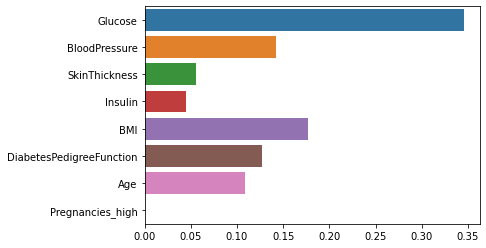

In [29]:
#중요도 수치 시각화
sns.barplot(x=model.feature_importances_, y= feature_names)

In [30]:
#이전과는 다르게 Pregnancies가 중요한 역할을 하지 않았다.

### 정확도 예측하기

In [37]:
diff_count = abs(Y_test - y_predict).sum()
diff_count

43

In [32]:
abs(Y_test - y_predict).sum()/len(Y_test) * 100

27.92207792207792

In [33]:
# 사이킷런의 accuracy 메트릭 사용
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, y_predict)

0.7207792207792207

In [34]:
model.score(X_test,Y_test)*100

72.07792207792207

- feature engineering :데이터에 대한 지식을 활용하여 특징을 만들어내는 과정
- 연속 수치 데이터를 범주형 변수로 변경한다.

- 정확도가 feature engineering 한것보다 더 떨어졌다.

가정 : 임신횟수가 많아 질 수록 데이터셋의 크기가 작아 오버피팅할 가능성이 높다.
       Pregnancies를 6을 기준으로해 boolean값을 만들어주서 오버피팅의 가능성을 낮춘다.
       
       -> feature engineering을 한다고 해서 항상 성능이 좋아지는 것은 아니다.
       -> 다양한 방법을 시도해 보아야한다.